#📌 Extracción

In [802]:
import pandas as pd

In [803]:
import numpy as np

In [804]:
df_telecom = pd.read_json('/content/TelecomX_Data.json')

In [805]:
df_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [806]:
df_customer = pd.json_normalize(df_telecom['customer'])
df_phone = pd.json_normalize(df_telecom['phone'])
df_internet = pd.json_normalize(df_telecom['internet'])
df_account = pd.json_normalize(df_telecom['account'])

In [807]:
df_telecom = pd.concat([df_telecom[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

In [808]:
df_telecom.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [809]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación

In [810]:
valores_nulos = df_telecom.isnull().sum()
valores_nulos

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [811]:
duplicados = df_telecom.duplicated().sum()
duplicados

np.int64(0)

In [812]:
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].replace(' ', np.nan)
df_telecom['Charges.Total'] = df_telecom['Charges.Total'].astype(np.float64)

In [813]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [814]:
columnas = df_telecom.select_dtypes(include='object').columns

for col in columnas:
    print(f'{col}: {df_telecom[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [815]:
df_telecom['Churn'] = df_telecom['Churn'].replace('', np.nan)


In [816]:
df_telecom = df_telecom.dropna(subset=['Churn'])

In [817]:
df_telecom.loc[:,'MultipleLines'] = df_telecom['MultipleLines'].replace('No phone service', 'No')

In [818]:
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in cols_internet:
  df_telecom[col] = df_telecom[col].replace('No internet service', 'No')

In [819]:
columnas = df_telecom.select_dtypes(include='object').columns

for col in columnas:
    print(f'{col}: {df_telecom[col].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['Yes' 'No']
StreamingTV: ['Yes' 'No']
StreamingMovies: ['No' 'Yes']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [820]:
df_telecom['Cuentas_Diarias'] = df_telecom['Charges.Monthly']/30

In [821]:
df_telecom[['Charges.Monthly', 'Cuentas_Diarias']].head()

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [822]:
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

In [823]:
df_telecom[cols_binarias] = df_telecom[cols_binarias].replace({'Yes': 1, 'No': 0}).astype(bool)

<ipython-input-823-1e5bda349e5a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom[cols_binarias] = df_telecom[cols_binarias].replace({'Yes': 1, 'No': 0}).astype(bool)


In [824]:
df_telecom = df_telecom.rename(columns={
    'customerID': 'IDCliente',
    'Churn': 'Cancelacion',
    'gender': 'Genero',
    'SeniorCitizen': 'MayorDeEdad',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'MesesContratado',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'MultiplesLineas',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadEnLinea',
    'OnlineBackup': 'CopiaSeguridadEnLinea',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'TransmisionTelevision',
    'StreamingMovies': 'TransmisionPeliculas',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturacionElectronica',
    'PaymentMethod': 'MetodosPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal',
    'Cuentas_Diarias': 'CostoDiario'
})

In [825]:
df_telecom.columns

Index(['IDCliente', 'Cancelacion', 'Genero', 'MayorDeEdad', 'Pareja',
       'Dependientes', 'MesesContratado', 'ServicioTelefonico',
       'MultiplesLineas', 'ServicioInternet', 'SeguridadEnLinea',
       'CopiaSeguridadEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'TransmisionTelevision', 'TransmisionPeliculas', 'TipoContrato',
       'FacturacionElectronica', 'MetodosPago', 'CargoMensual', 'CargoTotal',
       'CostoDiario'],
      dtype='object')

In [826]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IDCliente               7043 non-null   object 
 1   Cancelacion             7043 non-null   bool   
 2   Genero                  7043 non-null   object 
 3   MayorDeEdad             7043 non-null   int64  
 4   Pareja                  7043 non-null   bool   
 5   Dependientes            7043 non-null   bool   
 6   MesesContratado         7043 non-null   int64  
 7   ServicioTelefonico      7043 non-null   bool   
 8   MultiplesLineas         7043 non-null   bool   
 9   ServicioInternet        7043 non-null   object 
 10  SeguridadEnLinea        7043 non-null   bool   
 11  CopiaSeguridadEnLinea   7043 non-null   bool   
 12  ProteccionDispositivo   7043 non-null   bool   
 13  SoporteTecnico          7043 non-null   bool   
 14  TransmisionTelevision   7043 non-null   bool 

In [827]:
df_telecom['Genero'] = df_telecom['Genero'].replace({
    'Male': 'Hombre',
    'Female': 'Mujer'
})

In [828]:
df_telecom['MetodosPago'] = df_telecom['MetodosPago'].replace({
    'Electronic check': 'Cheque E.',
    'Mailed check': 'Cheque C.',
    'Bank transfer (automatic)': 'Transferencia',
    'Credit card (automatic)': 'Tarjeta C.'
})

In [829]:
df_telecom['TipoContrato'] = df_telecom['TipoContrato'].replace({
    'Month-to-month': 'Mes a mes',
    'Two year': 'Dos años',
    'One year': 'Un año'
})

#📊 Carga y análisis

In [830]:
#Copia del DataFrame

df_telecom_tmp = df_telecom.copy()
cols_bool = df_telecom.select_dtypes(include='bool').columns
df_telecom_tmp[cols_bool]=df_telecom_tmp[cols_bool].astype(int)

df_telecom_tmp.describe().T

,count,mean,std,min,25%,50%,75%,max
Cancelacion,7043.0,0.265370,0.441561,0.000000,0.000000,0.000,1.0000,1.000000
MayorDeEdad,7043.0,0.162147,0.368612,0.000000,0.000000,0.000,0.0000,1.000000
Pareja,7043.0,0.483033,0.499748,0.000000,0.000000,0.000,1.0000,1.000000
Dependientes,7043.0,0.299588,0.458110,0.000000,0.000000,0.000,1.0000,1.000000
MesesContratado,7043.0,32.371149,24.559481,0.000000,9.000000,29.000,55.0000,72.000000
ServicioTelefonico,7043.0,0.903166,0.295752,0.000000,1.000000,1.000,1.0000,1.000000
MultiplesLineas,7043.0,0.421837,0.493888,0.000000,0.000000,0.000,1.0000,1.000000
SeguridadEnLinea,7043.0,0.286668,0.452237,0.000000,0.000000,0.000,1.0000,1.000000
CopiaSeguridadEnLinea,7043.0,0.344881,0.475363,0.000000,0.000000,0.000,1.0000,1.000000
ProteccionDispositivo,7043.0,0.343888,0.475038,0.000000,0.000000,0.000,1.0000,1.000000


In [831]:
import seaborn as sns

In [832]:
#Contar concelaciones

cancelaciones = df_telecom_tmp['Cancelacion'].value_counts()
cancelaciones

,count
Cancelacion,
0,5174
1,1869


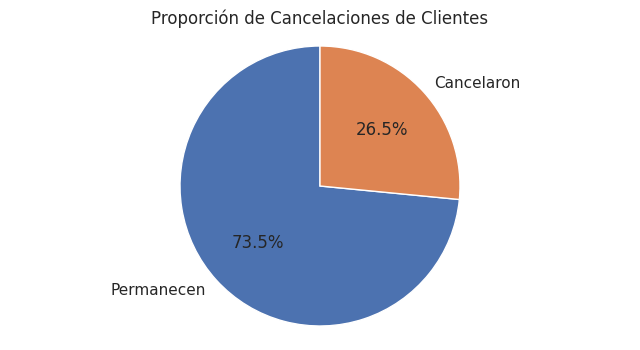

In [833]:
#Gráfico de cancelación de clientes

labels = ['Permanecen', 'Cancelaron']

plt.figure(figsize=(8,4))
plt.pie(cancelaciones, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Cancelaciones de Clientes')
plt.axis('equal')
plt.show()

In [834]:
#Cancelación por tipo de genero
cancelacion_genero = df_telecom_tmp[df_telecom_tmp['Cancelacion']==1]['Genero'].value_counts()

#Cancelación por tipo de contrato
cancelacion_contrato = df_telecom_tmp[df_telecom_tmp['Cancelacion']==1]['TipoContrato'].value_counts()

#Cancelación por método de pago
cancelacion_pago = df_telecom_tmp[df_telecom_tmp['Cancelacion']==1]['MetodosPago'].value_counts()


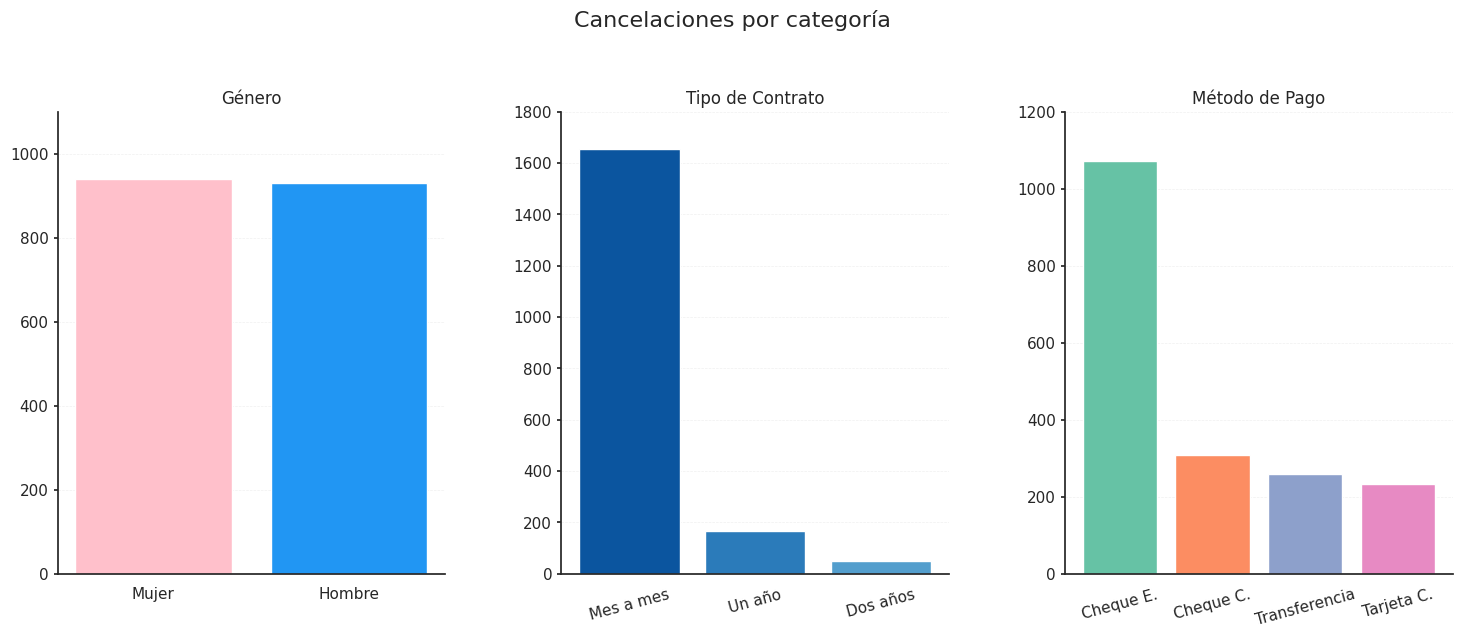

In [835]:
sns.set_style("white")

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Cancelaciones por categoría', fontsize=16, y=1.05)
fig.subplots_adjust(wspace=0.3)

# -------- Gráfico 1: Género --------
axs[0].bar(cancelacion_genero.index, cancelacion_genero.values, color=['pink', '#2196F3'])
axs[0].set_title("Género")
axs[0].set_ylim(0, 1100)

# -------- Gráfico 2: Tipo de Contrato --------
axs[1].bar(cancelacion_contrato.index, cancelacion_contrato.values, color=sns.color_palette("Blues_r"))
axs[1].set_title("Tipo de Contrato")
axs[1].set_ylim(0, 1800)
axs[1].tick_params(axis='x', rotation=15)

# -------- Gráfico 3: Método de Pago --------
total_pago = cancelacion_pago.sum()
porcentajes = (cancelacion_pago / total_pago * 100).round(1)

axs[2].bar(cancelacion_pago.index, cancelacion_pago.values, color=sns.color_palette("Set2"))
axs[2].set_title("Método de Pago")
axs[2].set_ylim(0, 1200)
axs[2].tick_params(axis='x', rotation=15)

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.yaxis.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)
    ax.yaxis.set_ticks_position('left')
    ax.tick_params(axis='y', direction='out', length=3)

plt.show()

#📄Informe final

###**Cancelación de clientes**

Media: Aproximadamente 26.5% de los clientes se dieron de baja. Es decir, 7 de cada 10 personas permanecen, y 3 de cada 10 se van.

###**Perfil del cliente**

- Solo el 16% son mayores de edad.
- Casi la mitad de los clientes viven en pareja.
- El 30% tiene personas a cargo.
- Equilibrado entre hombres y mujeres.

###**Servicios contratados**

- El mayor servicio contratado es el Teléfonico con un 90%.
- El menor servicio contratado es la suscripción a seguridad en línea.

###**Finanzas**

- CostoDiario: el gasto promedio diario es de 2.16.
- CargoMensual: la mayoría paga entre 35 y 90 por mes.
- CargoTotal: Mucha variabilidad, hay clientes nuevos y antiguos.
- MesesContrato: la mayoría lleva entre 9 y 55 meses como cliente.
